# **week 7**

# **문제1**

### **1.1 다음 코드를 실행해서 데이터 프레임을 생성하세요.**

In [1]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

### **1.2 데이터 프레임을 확인하고, X= calory, breakfast, lunch, dinner, exercise / y=body_shape로 변수 분리하세요**

In [2]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [3]:
y = df['body_shape']
X = df.drop('body_shape',axis = 1,inplace = False)

In [4]:
X

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


In [5]:
y

0    Skinny
1    Normal
2       Fat
3    Skinny
4       Fat
5    Skinny
6    Normal
7       Fat
8    Normal
9       Fat
Name: body_shape, dtype: object

### **1.3 X 데이터 값의 범위가 균일하지 않으므로 standard scaler를 이용해서 리스케일 해주세요.**

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
x_std = StandardScaler().fit_transform(X)

In [8]:
x_std.shape

(10, 5)

### **1.4 사이킷런 PCA 클래스를 이용해서 5차원 데이터를 1차원으로 변환하고 shape를 확인해주세요.**

In [9]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components = 1)

pca.fit(x_std)
x_pca = pca.transform(x_std)

print(x_pca.shape)

(10, 1)


### **1.5 explained_variance_ratio_ 변수를 이용해서 보존된 변동성 비율을 확인해주세요.**

In [11]:
pca.explained_variance_ratio_

# 원본 데이터 셋에 대해 73.2% 정도 변동성이 보존된다.

array([0.73183217])

### **1.6 적절한 차원의 수 선택하기 - 원본 데이터셋의 분산을 95%로 유지하는데 필요한 최소한의 PC 개수, 즉 차원 수 d를 구하세요.**

In [12]:
import numpy as np

In [13]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum > 0.95) + 1
print(d)

1


### **1.7 n_components를 설정하여 PCA를 다시 실행하는 인자로 보존할 분산의 비율을 넣어주세요. (분산의 비율 : 0.95) 이를 X_reduced에 저장하세요 그 후 shape을 통해서 몇차원으로 압축되었는지 확인하세요.**

In [14]:
pca_2 = PCA(n_components = 0.95)
X_reduced = pca_2.fit_transform(x_std)
print(X_reduced.shape)

# 4차원 데이터로 압축되었다.

(10, 4)


### **1.8 압축된 데이터셋에 PCA 투영의 변환을 반대로 적용하여 다시 원래의 차원으로 되돌리세요 그 후 shape을 통해서 원래의 차원으로 잘 돌아왔는지 확인하세요.**

In [15]:
X_recovered = pca_2.inverse_transform(X_reduced)
print(X_recovered.shape)

# 다시 5차원 데이터로 잘 돌아온 것을 확인할 수 있다.

(10, 5)


### **1.9 랜덤 PCA를 이용하여 데이터를 2차원으로 압축하세요. (random_state=42)**




In [16]:
random_pca = PCA(n_components = 2,svd_solver = "randomized",random_state = 42)
X_reduced_random = random_pca.fit_transform(x_std)
print(X_reduced_random.shape)

(10, 2)


### **1.10 점진적 PCA를 이용하여 데이터를 4차원으로 압축하세요. (배치사이즈:2) 그 후 shape을 통해 확인하세요.**




In [17]:
from sklearn.decomposition import IncrementalPCA

In [18]:
n_batches = 2
inc_pca = IncrementalPCA(n_components = 4)

for X_batch in np.array_split(x_std,n_batches):
  inc_pca.partial_fit(X_batch)

X_reduced_inc = inc_pca.transform(x_std)
print(X_reduced_inc.shape)

(10, 4)


### **1.11 커널 PCA를 이용하여 데이터를 2차원으로 압축하세요. (kernel="rbf",gamma=0.4) 그 후 shape을 통해 확인하세요.**


In [19]:
from sklearn.decomposition import KernelPCA

In [20]:
rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.4)
X_reduced_rbf = rbf_pca.fit_transform(x_std)
print(X_reduced_rbf.shape)

(10, 2)


### **1.12 커널 PCA의 하이퍼파라미터를 선택하세요.kPCA를 이용하여 2차원으로 축소하고 Logistic Regression으로 Classification을 진행하세요. 그 다음 가장 높은 accuracy를 얻기 위해 GridSearchCV를사용하여 kPCA에 가장 좋은 커널과 gamma 파라미터를 구하세요.**
**이때, kpca__kernel은 ["linear", "poly", "rbf", "sigmoid", "cosine"], kpca__gamma"은 np.linspace(0.03, 0.05, 1,2,10)**


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [22]:
clf = Pipeline([
    ("kpca",KernelPCA(n_components = 2)),
    ("log_reg",LogisticRegression(solver = "lbfgs"))
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 1,2,10),
    "kpca__kernel":["linear", "poly", "rbf", "sigmoid", "cosine"]
}]

In [23]:
grid_search = GridSearchCV(clf,param_grid,cv = 3)
grid_search.fit(x_std,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line 3

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': (array([0.03]), nan),
                          'kpca__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                           'cosine']}])

In [24]:
print(grid_search.best_params_)

{'kpca__gamma': array([0.03]), 'kpca__kernel': 'linear'}


# **문제2**

### **2.1 다음 iris 데이터 세트를 출력해주세요.**

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()

In [26]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target

In [27]:
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### **2.2 X 데이터 값을 standard scaler를 이용해서 표준화 해주세요.**

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
y = irisDF['target']
X = irisDF.drop('target',axis = 1,inplace = False)

In [30]:
x_std = StandardScaler().fit_transform(X)

In [31]:
x_std.shape

(150, 4)

### **2.3 PCA를 이용해 4차원 데이터를 2차원으로 변환해주세요.**

In [32]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components = 2)
x_2D = pca.fit_transform(x_std)
print(x_2D.shape)

(150, 2)


### **2.4 PCA 변환된 데이터의 칼럼 명을 pca_component1, pca_component2로 명명해서 새로운 dataframe을 만들어주세요.**

In [39]:
pca_columns = ['pca_component1', 'pca_component2']
irisDF_pca = pd.DataFrame(x_2D,columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component1,pca_component2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


### **2.5 원본 데이터와 PCA 데이터를 각각 XGBoost로 학습시키고 (random_state=15), cross_val_score()로 5개의 교차 검증 세트로 정확도를 비교해주세요.**

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [41]:
### 원본 데이터

rcf = RandomForestClassifier(random_state = 15)
scores = cross_val_score(rcf,iris.data,iris.target,scoring = "accuracy",cv = 5)
print("원본 데이터 교차검증 개별 정확도: ",scores)
print("원본 데이터 평균 정확도: ",np.mean(scores))

원본 데이터 교차검증 개별 정확도:  [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
원본 데이터 평균 정확도:  0.96


In [42]:
### PCA 데이터

pca_X = irisDF_pca[['pca_component1', 'pca_component2']]
scores_pca = cross_val_score(rcf,pca_X,iris.target,scoring = "accuracy",cv = 5)
print("pca 데이터 교차검증 개별 정확도: ",scores_pca)
print("pca 데이터 평균 정확도: ",np.mean(scores_pca))

pca 데이터 교차검증 개별 정확도:  [0.83333333 0.93333333 0.83333333 0.9        1.        ]
pca 데이터 평균 정확도:  0.9


4개의 속성이 2개의 변환 속성으로 감소한 것을 고려하면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 볼 수 있다.

# **문제3**

### **3.1 기본적인 LDA 구현을 위한 라이브러리를 import 해주세요. 와인 데이터도 로드해주세요.**

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_wine

### **3.2 X에는 features를 y에는 target을 저장해주세요.**

In [72]:
wine = load_wine()

In [73]:
wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target

In [74]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [75]:
y = wine_df['target']
X = wine_df.drop('target',axis = 1,inplace = False)

In [76]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### **3.3 X의 형태를 확인해주세요. (178,13)이 나와야합니다.**

In [77]:
X.shape

(178, 13)

### **3.4 X의 행 5개를 확인해주세요.**

In [78]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### **3.5 target들의 종류를 확인해주세요.**

In [87]:
wine_df['target'].unique()

# 0,1,2 3가지로 분류될 수 있다.

array([0, 1, 2])

### **3.6 X_lda에 lda를 fit해주세요.**

In [80]:
wine_scaled = StandardScaler().fit_transform(wine.data)

In [82]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(wine_scaled,wine.target)
X_lda = lda.transform(wine_scaled)
print(X_lda.shape)

(178, 2)


### **3.7 2차원 평면에 표현해주세요. 교재 395페이지를 참조해주세요.**

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
lda_columns = ['lda_component_1','lda_component_2']
wineDF_lda = pd.DataFrame(X_lda,columns = lda_columns)
wineDF_lda['target'] = wine.target

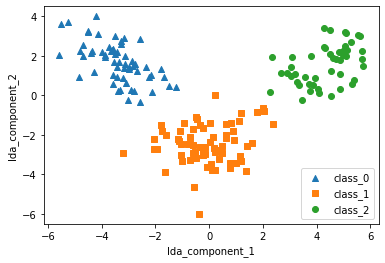

In [92]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
  x_axis_data = wineDF_lda[wineDF_lda['target'] == i]['lda_component_1']
  y_axis_data = wineDF_lda[wineDF_lda['target'] == i]['lda_component_2']

  plt.scatter(x_axis_data,y_axis_data,marker = marker,label = wine.target_names[i])

plt.legend(loc = 'lower right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()